In [3]:
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.image as img
import pandas as pd
import statistics
from PIL import Image

In [4]:
wfPath = "Dataset/train/wildfire/"
nwfPath = "Dataset/train/nowildfire/"

wfData = os.listdir(wfPath)
nwfData = os.listdir(nwfPath)
wfDataSize = []
nwfDataSize = []
wfDupDict = dict()
nwfDupDict = dict()
duplicates = []


for i in wfData:
    wfDataSize.append(int(os.path.getsize(wfPath + i)/1000))

for i in nwfData:
    nwfDataSize.append(int(os.path.getsize(nwfPath + i)/1000))

In [5]:
#Checking for duplicates

for i in wfData:
    try: 
        imgdata = img.imread(wfPath + i)
        if str(imgdata) in wfDupDict.keys():
            wfDupDict[str(imgdata)] += 1
            duplicates.append(str(imgdata))
            print("WF Dup found")
            wfData.remove(i)
        else:
            wfDupDict[str(imgdata)] = 1
    except: 
        print("error")

for i in nwfData:
    try:
        imgdata = img.imread(nwfPath + i)
        if str(imgdata) in nwfDupDict.keys():
            nwfDupDict[str(imgdata)] += 1
            duplicates.append(str(imgdata))
            print("NWF Dup Found")
            nwfData.remove(i)
        else:
            nwfDupDict[str(imgdata)] = 1
    except:
        nwfData.remove(i)
        print("error in nwfDupDict")


print("Number of Duplicates: " + str(len(duplicates)))

error in nwfDupDict
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
NWF Dup Found
Number of Duplicates: 27


In [6]:
def removeDuplicates(data, path):
    dupDict = dict()
    dups = []
    for i in data:
        try:
            imgdata = img.imread(path + i)
            if str(imgdata) in dupDict.keys():
                dupDict[str(imgdata)] += 1
                dups.append(str(imgdata))
                print("Dup Found")
                data.remove(i)
            else:
                dupDict[str(imgdata)] = 1
        except:
            data.remove(i)
            print("error in DupDict")

In [7]:
wfTestPath = "Dataset/test/wildfire/"
nwfTestPath = "Dataset/test/nowildfire/"
wfValPath = "Dataset/valid/wildfire/"
nwfValPath = "Dataset/valid/nowildfire/"

wfTestData = os.listdir(wfTestPath)
nwfTestData = os.listdir(nwfTestPath)
wfValData = os.listdir(wfValPath)
nwfValData = os.listdir(nwfValPath)

removeDuplicates(wfTestData, wfTestPath)
removeDuplicates(nwfTestData, nwfTestPath)
removeDuplicates(wfValData, wfValPath)
removeDuplicates(nwfValData, nwfValPath)


wfTestDataSize = []
nwfTestDataSize = []
wfValDataSize = []
nwfValDataSize = []

for i in wfTestData:
    wfTestDataSize.append(int(os.path.getsize(wfTestPath + i)/1000))
for i in nwfTestData:
    nwfTestDataSize.append(int(os.path.getsize(nwfTestPath + i)/1000))
for i in wfValData:
    wfValDataSize.append(int(os.path.getsize(wfValPath + i)/1000))
for i in nwfValData:
    nwfValDataSize.append(int(os.path.getsize(nwfValPath + i)/1000))



error in DupDict
error in DupDict
Dup Found
Dup Found
Dup Found
Dup Found
Dup Found


In [8]:
#Functions for calculating the statistics

def Stats(data, x, path):
    differences = []
    data.sort()
    mean = statistics.mean(data)
    median = statistics.median(data)
    maximum = max(data)
    minimum = min(data)
    dataRange = (maximum - minimum)
    firstQuantile = np.quantile(data, .25)
    thirdQuantile = np.quantile(data, .75)
    iqr = thirdQuantile - firstQuantile
    lower_bound = firstQuantile - (1.5 * iqr)
    upper_bound = thirdQuantile + (1.5 * iqr)
    outliers_belowLowerBound = [x for x in data if x <= lower_bound]
    outliers_aboveUpperBound = [x for x in data if x >= upper_bound]
    outliers = outliers_belowLowerBound + outliers_aboveUpperBound

    for i in x:
        if int(os.path.getsize(path + i)/1000) not in outliers:
            differences.append(i)

    
    

    betMinMed = len(data[:data.index(median)])
    betMedMax = len(data[data.index(median):])

    print("Range = " + str(dataRange))
    print("IQR = " + str(iqr))
    print("Mean = " + str(mean))
    print("Data between min and median = " + str(betMinMed))    
    print("Data between median and max = " + str(betMedMax))  
    print("min = " + str(minimum) + "  Q1 = " + str(firstQuantile) + "  median = " + str(median) + "  Q3 = " + str(thirdQuantile) + "  max = " + str(maximum))
    print("lowerBound = " + str(lower_bound))
    print("upperBound = " + str(upper_bound))
    print("Outliers = " + str(len(outliers_aboveUpperBound) + len(outliers_belowLowerBound)))
    
    
    plt.boxplot(data)
    plt.show()

  
    
    return(differences)

WF Train Data
Range = 68
IQR = 9.0
Mean = 32.48679365079365
Data between min and median = 7564
Data between median and max = 8186
min = 2  Q1 = 28.0  median = 33.0  Q3 = 37.0  max = 70
lowerBound = 14.5
upperBound = 50.5
Outliers = 202


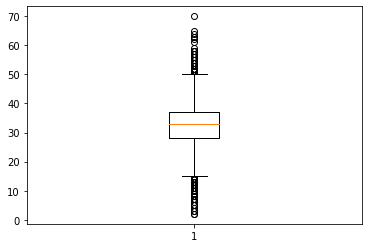


NWF Train Data
Range = 59
IQR = 13.0
Mean = 39.23586206896552
Data between min and median = 7004
Data between median and max = 7496
min = 2  Q1 = 34.0  median = 42.0  Q3 = 47.0  max = 61
lowerBound = 14.5
upperBound = 66.5
Outliers = 381


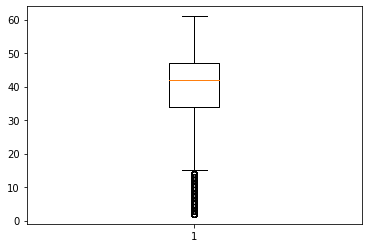


WF Test Data
Range = 66
IQR = 9.0
Mean = 32.24525589419206
Data between min and median = 1504
Data between median and max = 1974
min = 5  Q1 = 28.0  median = 32.0  Q3 = 37.0  max = 71
lowerBound = 14.5
upperBound = 50.5
Outliers = 43


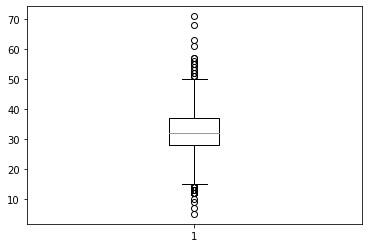


NWF test Data
Range = 58
IQR = 12.0
Mean = 39.87624113475177
Data between min and median = 1306
Data between median and max = 1514
min = 2  Q1 = 35.0  median = 42.0  Q3 = 47.0  max = 60
lowerBound = 17.0
upperBound = 65.0
Outliers = 116


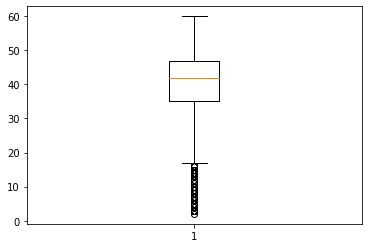


WF Val Data
Range = 58
IQR = 8.0
Mean = 32.29683908045977
Data between min and median = 1502
Data between median and max = 1978
min = 6  Q1 = 28.0  median = 32.0  Q3 = 36.0  max = 64
lowerBound = 16.0
upperBound = 48.0
Outliers = 81


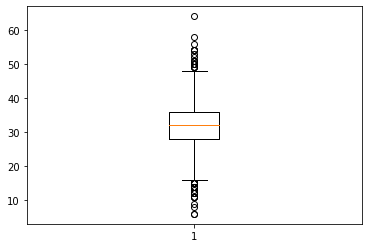


NWF Val Data
Range = 65
IQR = 13.0
Mean = 39.43516873889876
Data between min and median = 1324
Data between median and max = 1491
min = 2  Q1 = 34.0  median = 42  Q3 = 47.0  max = 67
lowerBound = 14.5
upperBound = 66.5
Outliers = 76


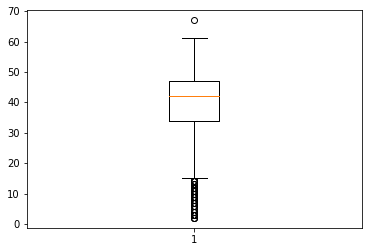

In [9]:
print("WF Train Data")
processedTrainWfData = Stats(wfDataSize, wfData, wfPath)
print("")
print("NWF Train Data")
processedTrainNwfData = Stats(nwfDataSize, nwfData, nwfPath)
print("")

print("WF Test Data")
processedTestWfData = Stats(wfTestDataSize, wfTestData, wfTestPath)
print("")
print("NWF test Data")
processedTestNwfData = Stats(nwfTestDataSize, nwfTestData, nwfTestPath)
print("")

print("WF Val Data")
processedValWfData = Stats(wfValDataSize, wfValData, wfValPath)
print("")
print("NWF Val Data")
processedValNwfData = Stats(nwfValDataSize, nwfValData, nwfValPath)
print("")

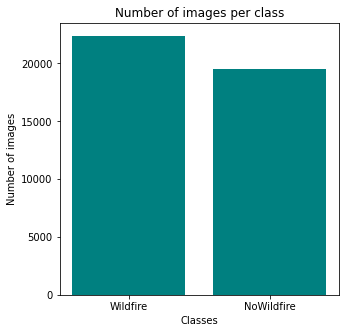

WF data:  22382
NWF data:  19561


In [10]:
def plotBar():
    classes = ["Wildfire", "NoWildfire"]
    values = [len(processedTrainWfData)+len(processedTestWfData)+len(processedValWfData), 
              len(processedTrainNwfData)+len(processedTestNwfData)+len(processedValNwfData)]


    fig = plt.figure(figsize = (5, 5))
    
    # creating the bar plot
    plt.bar(classes, values, color ='teal',
            width = 0.8)
    
    plt.xlabel("Classes")
    plt.ylabel("Number of images")
    plt.title("Number of images per class")
    plt.show()
    print("WF data: ", len(processedTrainWfData)+len(processedTestWfData)+len(processedValWfData))
    print("NWF data: ", len(processedTrainNwfData)+len(processedTestNwfData)+len(processedValNwfData))

plotBar()

In [11]:
def finishCleaning(wf, nwf, label, Path):

    imagePaths = []
    imageLabels = []

    for i in wf:
        imagePaths.append(Path +'wildfire/' + i)
        imageLabels.append(0)

    for i in nwf:
        imagePaths.append(Path + 'nowildfire/' + i)
        imageLabels.append(1)

    finalDF = pd.DataFrame()
    finalDF['images'] = [i for i in imagePaths]
    finalDF['labels'] = [i for i in imageLabels]


    finalDF = finalDF.sample(frac = 1)
    
    print(finalDF.head(10))
    print(len(finalDF))

    finalDF.to_csv('WildfireData' + label+'.csv')

In [12]:
finishCleaning(processedTrainWfData, processedTrainNwfData, 'Train', 'Dataset/train/')
finishCleaning(processedTestWfData, processedTestNwfData, 'Test', 'Dataset/test/')
finishCleaning(processedValWfData, processedValNwfData, 'Val', 'Dataset/valid/')



                                                  images  labels
792        Dataset/train/wildfire/-66.88727,50.03148.jpg       0
2874         Dataset/train/wildfire/-70.8342,45.3875.jpg       0
10645      Dataset/train/wildfire/-75.67095,46.05576.jpg       0
21452  Dataset/train/nowildfire/-123.149462,49.204368...       1
17132  Dataset/train/nowildfire/-114.061491,51.069523...       1
27505   Dataset/train/nowildfire/-79.342883,43.78262.jpg       1
21206  Dataset/train/nowildfire/-123.116703,49.215196...       1
16108  Dataset/train/nowildfire/-113.966025,50.931301...       1
28199   Dataset/train/nowildfire/-79.45515,43.904456.jpg       1
11618         Dataset/train/wildfire/-76.208,46.4298.jpg       0
29666
                                                 images  labels
5546   Dataset/test/nowildfire/-75.795722,45.353503.jpg       1
5755    Dataset/test/nowildfire/-79.374341,43.75248.jpg       1
1406       Dataset/test/wildfire/-72.83385,46.83004.jpg       0
2113       Dataset/test

In [4]:
LoadedTrainData = pd.read_csv('WildfireDataTrain.csv')
LoadedTestData = pd.read_csv('WildfireDataTest.csv')
LoadedValData = pd.read_csv('WildfireDataVal.csv')

TrainX = []
TrainY = []
TestX = []
TestY = []
ValX = []
ValY = []


for i in LoadedTrainData['images']:
    try:
        image = img.imread(i)
        TrainX.append(image)
    except: 
        print("error")
    

for i in LoadedTrainData['labels']:
    TrainY.append(i)
    
for i in LoadedTestData['images']:
    image = img.imread(i)
    TestX.append(image)

for i in LoadedTestData['labels']:
    TestY.append(i)
    
for i in LoadedValData['images']:
    image = img.imread(i)
    ValX.append(image)

for i in LoadedValData['labels']:
    ValY.append(i)


In [5]:
TrainX = np.asarray(TrainX)
TrainY = np.asarray(TrainY)
TestX = np.asarray(TestX)
TestY = np.asarray(TestY)
ValX = np.asarray(ValX)
ValY = np.asarray(ValY)

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, optimizers

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), input_shape=(350, 350, 3)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(16))
model.add(layers.LeakyReLU())
model.add(layers.Dense(2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 348, 348, 8)       224       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 348, 348, 8)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 174, 174, 8)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 172, 172, 8)       584       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 172, 172, 8)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 86, 86, 8)        0         
 2D)                                                  

In [8]:
epochs = 5
batch_size = 100
learning_rate = 0.00001

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(TrainX[:10000], TrainY[:10000], epochs=epochs, 
                    validation_data=(ValX[:2000], ValY[:2000]))

Epoch 1/5
313/313 [==============================] - 164s 522ms/step - loss: 0.6927 - accuracy: 0.5176 - val_loss: 0.6893 - val_accuracy: 0.5535
Epoch 2/5
113/313 [=========>....................] - ETA: 1:36 - loss: 0.6930 - accuracy: 0.5124

: 

: 

192/192 - 32s - loss: 0.2164 - accuracy: 0.9321 - 32s/epoch - 166ms/step


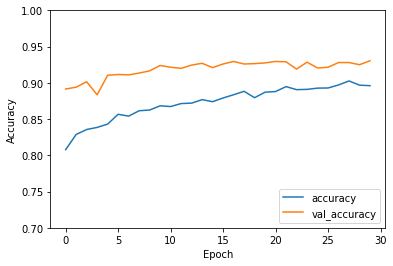

In [98]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(TestX,  TestY, verbose=2)







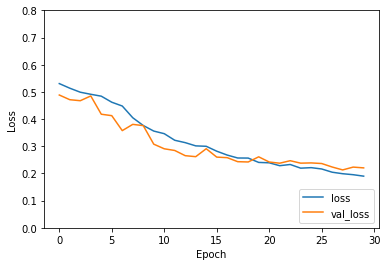

In [97]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')